# Convergence of 3D tweezer potential

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Lifetime fitting

Test case for 1D

1D N=20 R0=[3.  3.  7.2]w
freq=[0.2]V_0
t=[13.96]
Gaussian potential starts.
param_set: model is Gaussian/tweezer potential.
['x']-mirror symmetry is used.
n=[20  0  0], dx=[0.15 3.   7.2 ]w, p=[1 0 0], model=Gaussian,
t=[13.96],
t_step=[0.01]
starts.
Matrix size= 41
Estimated full matrix memory usage, float: 0.01 MiB, complex: 0.03 MiB
Parameter setting time: 0.00s.

H_mat: n=[20  0  0] dx=[0.15 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.00 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.01s.
H_solver: eigenstates memory usage: 0.00 MiB.
Initial state preparation finished. Time spent: 0.01s.

H_mat: n=[20  0  0] dx=[0.15 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.01 MiB.
H_mat: n=[20  0  0] dx=[0.15 0.   0.  ]w p=[1 0 0] Gaussian starts.
H_mat: H matrix memory usage: 0.01 MiB.
H_solver: free particle Hamiltonian solve

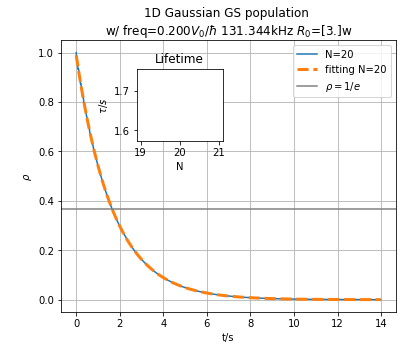

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os
from plot_dynamics import plot_dynamics

N = 20
freq = 0.2
os.system('python3 -u dynamics_exe.py -a -n {} -d 1 -m Gaussian -f {}'.format(
    N, freq))
os.system('mv *.h5 ../output')

N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.array([.005, .01, .02, .04, .06, .08, .1, .12, .16, .2])
freq_list = np.array([freq])
# freq_list = freq_list[list(range(4, 8)) + [-1]]
# freq_list = np.array([freq_list[-1]])
an = 0
length = 1
st = 5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-2
st[np.nonzero(freq_list == .06)] = .125
sn = 1000.0

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              freq_list=freq_list,
              stop_time_list=st,
              step_no=sn,
              dim=1,
              length=length,
              avg_no=an,
              symmetry=True,
              model='Gaussian',
              realtime=False,
              absorber=True,
              cvg='N',
              fit=True)

3D

param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 3.80681e-05s.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 0.001988s.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 0.085742s.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 3.68994s.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 3.80681e-05s.
param_set: model is Gaussian/tweezer potential.
param_set: model is Gaussian/tweezer potential.
param_set: model is

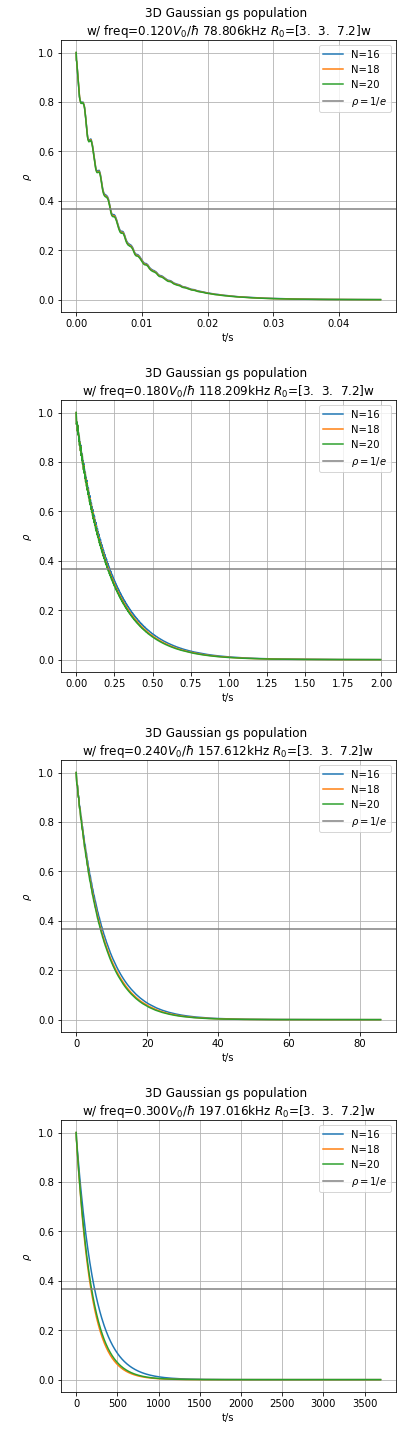

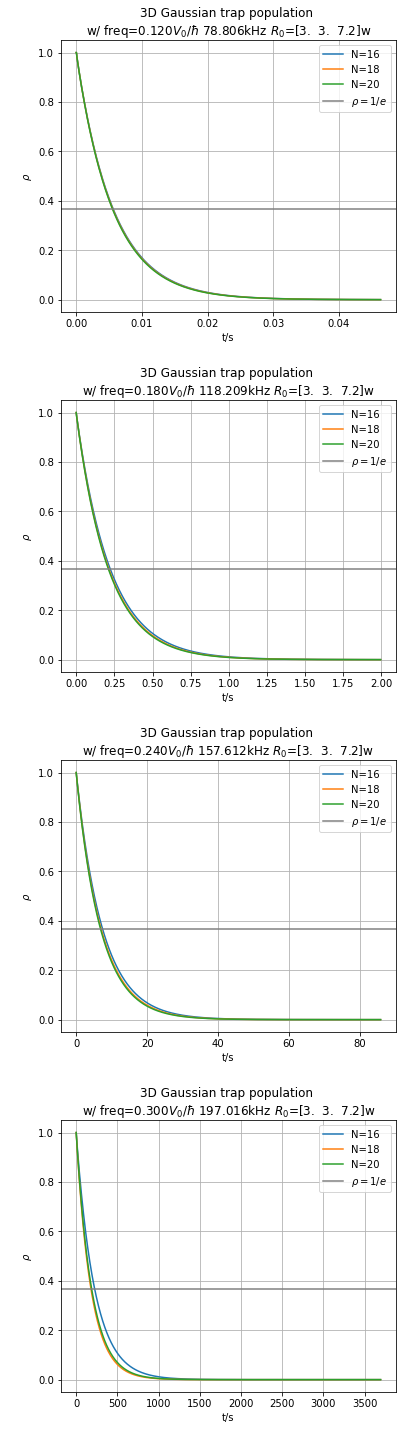

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os
from plot_dynamics import plot_dynamics

N_list = range(16, 21, 2)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.36, 0.06)
an = 0
length = 1
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-3
sn = 1000.0

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              freq_list=freq_list,
              stop_time_list=st,
              step_no=sn,
              dim=3,
              length=length,
              avg_no=an,
              model='Gaussian',
              realtime=False,
              absorber=True,
              cvg='N',
              fit=False)

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              freq_list=freq_list,
              stop_time_list=st,
              step_no=sn,
              dim=3,
              length=length,
              avg_no=an,
              model='Gaussian',
              quantity='trap',
              realtime=False,
              absorber=True,
              cvg='N',
              fit=False)


## Lifetime vs Driving frequency

param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 3.80681e-05s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 0.000561504s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z'

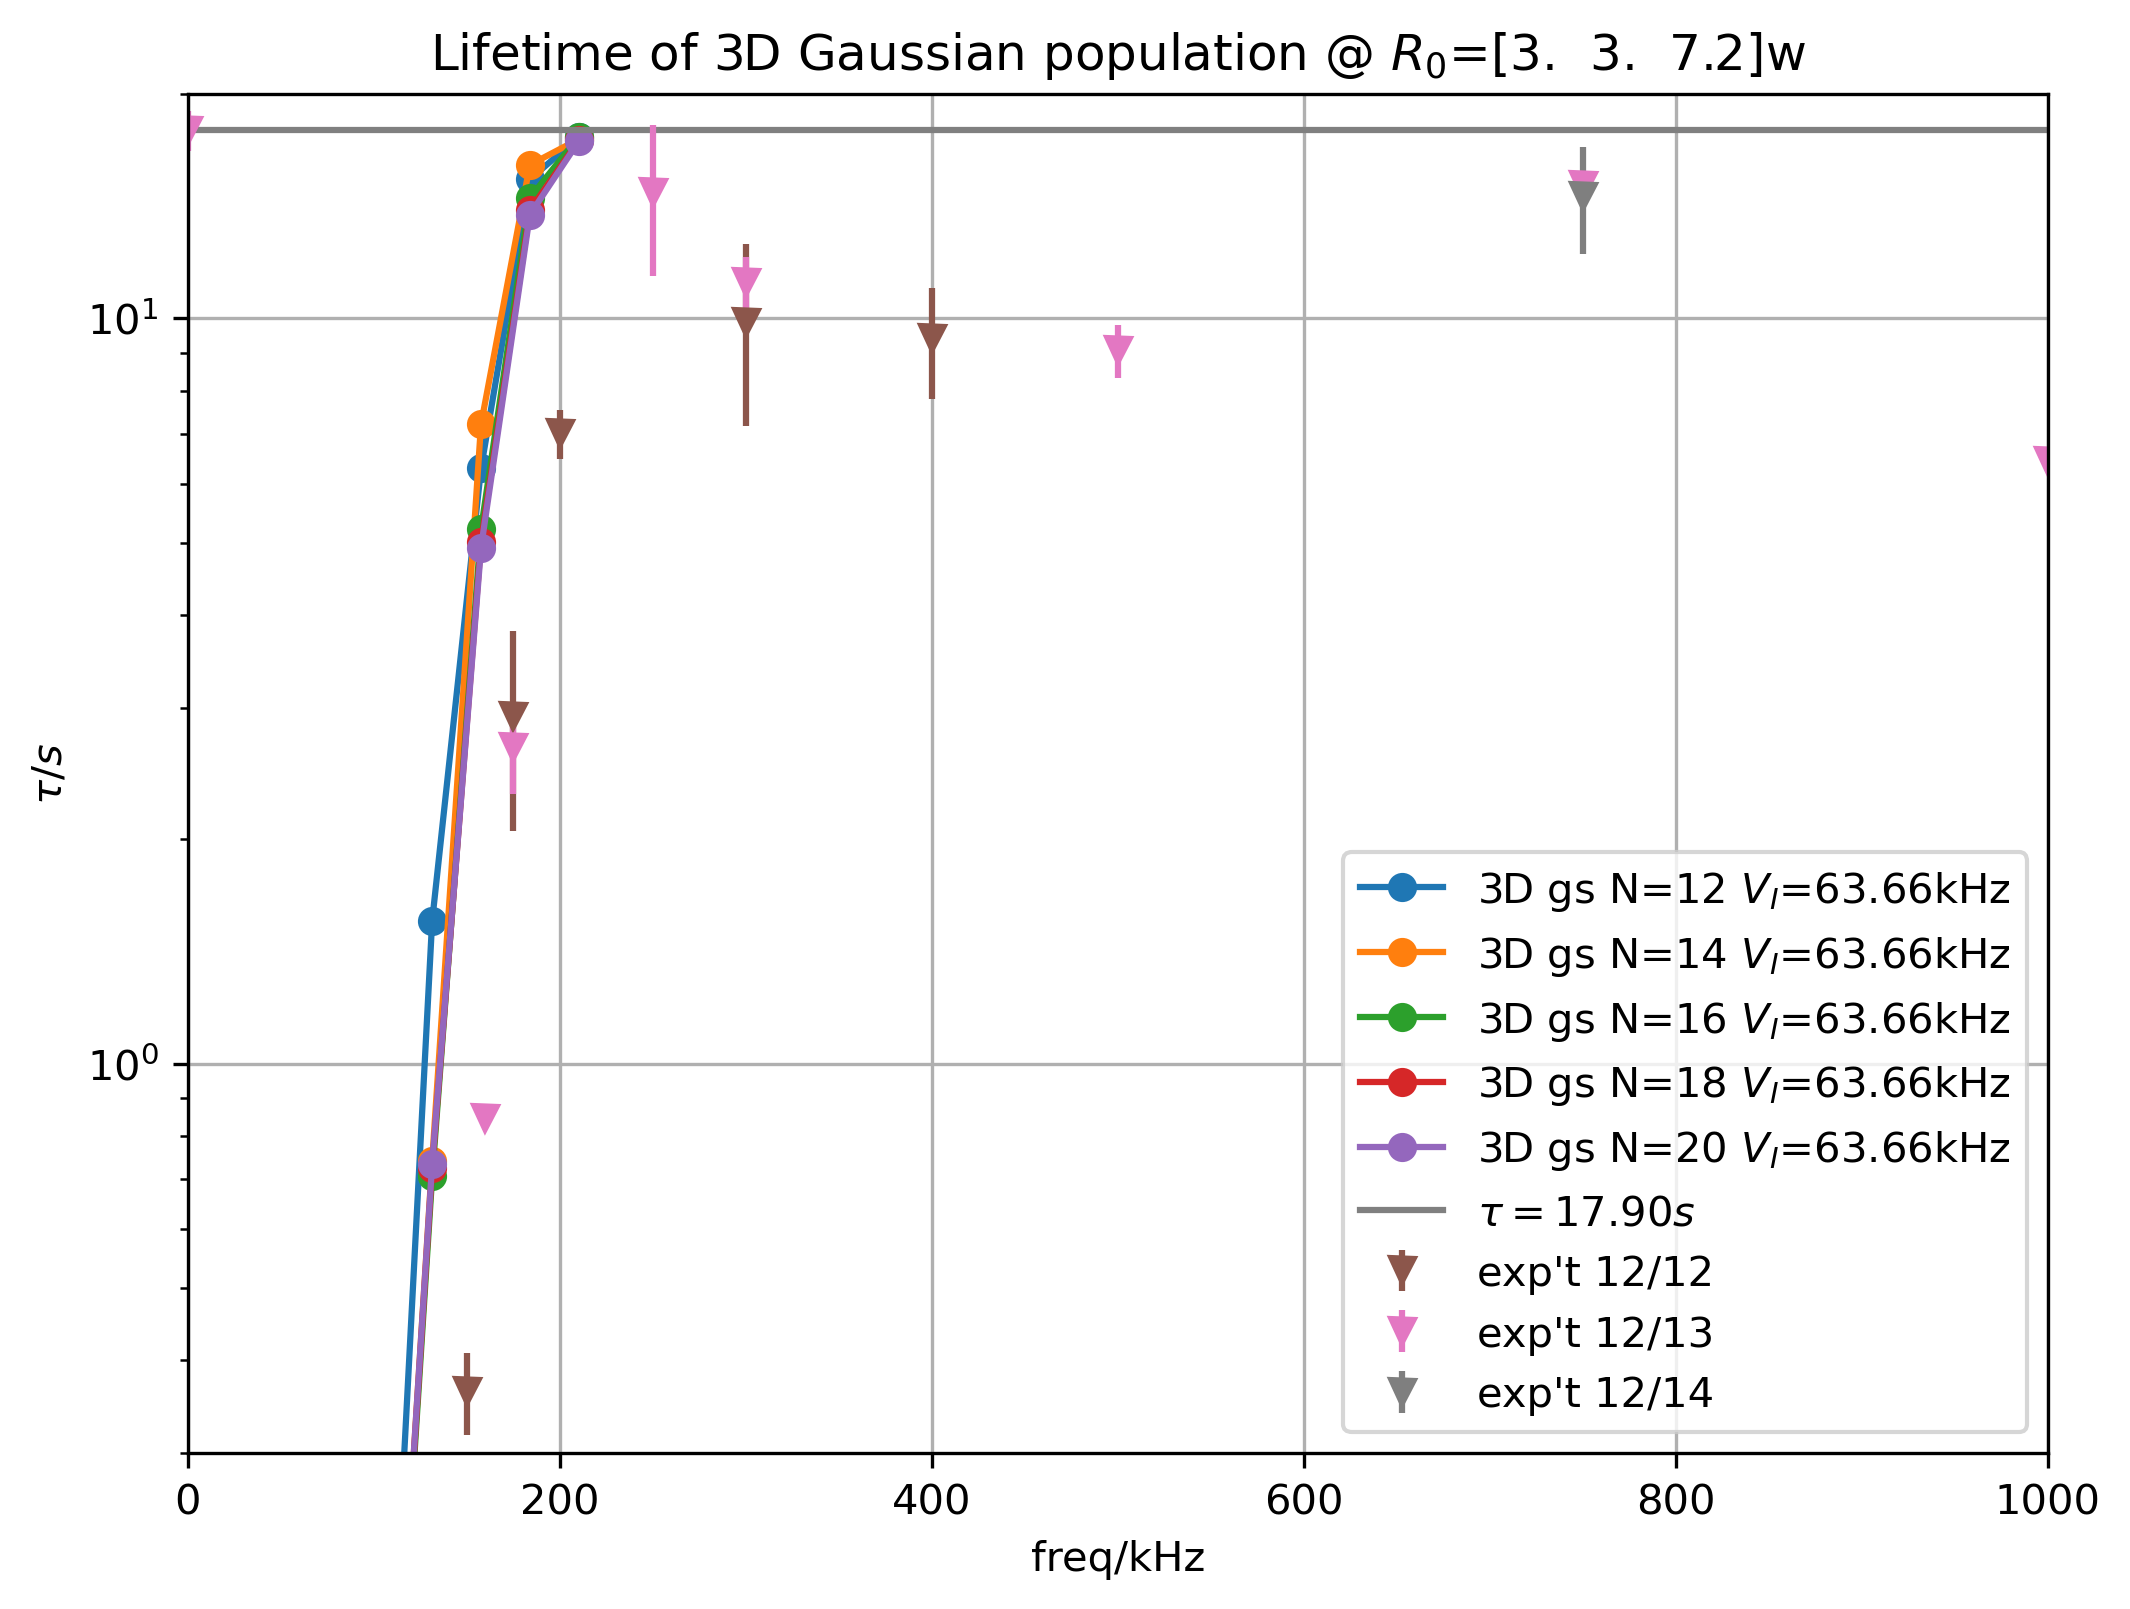

In [1]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os

N = 18
N_list = range(12, 21, 2)
# N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.35, 0.04)
length = 1
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-3
# st[np.nonzero(freq_list == .06)] = 2.5E-5 * np.exp(.06 * 62.7)
sn = 1000.0
t0 = 17.9

# os.system('rm *.csv')
ax = plot_saturation(N_list,
                     R0_list=[R for i in range(len(N_list))],
                     freq_list=freq_list,
                     stop_time_list=st,
                     step_no=sn,
                     symmetry=True,
                     dim=3,
                     tau=t0,
                     file=False,
                     absorber=True,
                     ab_param=(LI, VI0),
                     model='Gaussian',
                     cvg='N')

# plot_saturation(
#     N_list,
#     R0_list=[R for i in range(len(N_list))],
#     freq_list=freq_list,
#     stop_time_list=st,
#     step_no=sn,
#     ext_ax=ax,
#     dim=3,
#     tau=t0,
#     file=False,
#     absorber=True,
#     ab_param=(0.3 * w, 8E5 * 2 * np.pi / V0_SI),
#     model='Gaussian',
#     quantity='gs',
#     cvg='N')

# plot_saturation(
#     N_list,
#     R0_list=[R for i in range(len(N_list))],
#     freq_list=freq_list,
#     stop_time_list=st,
#     step_no=sn,
#     ext_ax=ax,
#     dim=3,
#     tau=t0,
#     file=False,
#     absorber=True,
#     # ab_param=(0.3 * w, 4E5 / V0_SI),
#     model='Gaussian',
#     # quantity='gs',
#     quantity='trap',
#     cvg='N')


In [13]:
import numpy as np

N = 10000
a= np.random.rand(N)+ 1j* np.random.rand(N)
f1 = lambda a:np.linalg.norm(a)**2
f2 = lambda a:np.sum(np.abs(a)**2)
f3 = lambda a:np.inner(a.conj(),a).real
print(a.shape)
print(f1(a))
print(f2(a))
print(f3(a))
%timeit f1(a)
%timeit f2(a)
%timeit f3(a)

(10000,)
6627.3637784882285
6627.3637784882285
6627.363778488229


## Wavefunction dynamics

param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 3.80681e-05s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 0.000561504s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 0.00698168s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-mirror symmetry is used.
Time step is set to: 0.085742s.


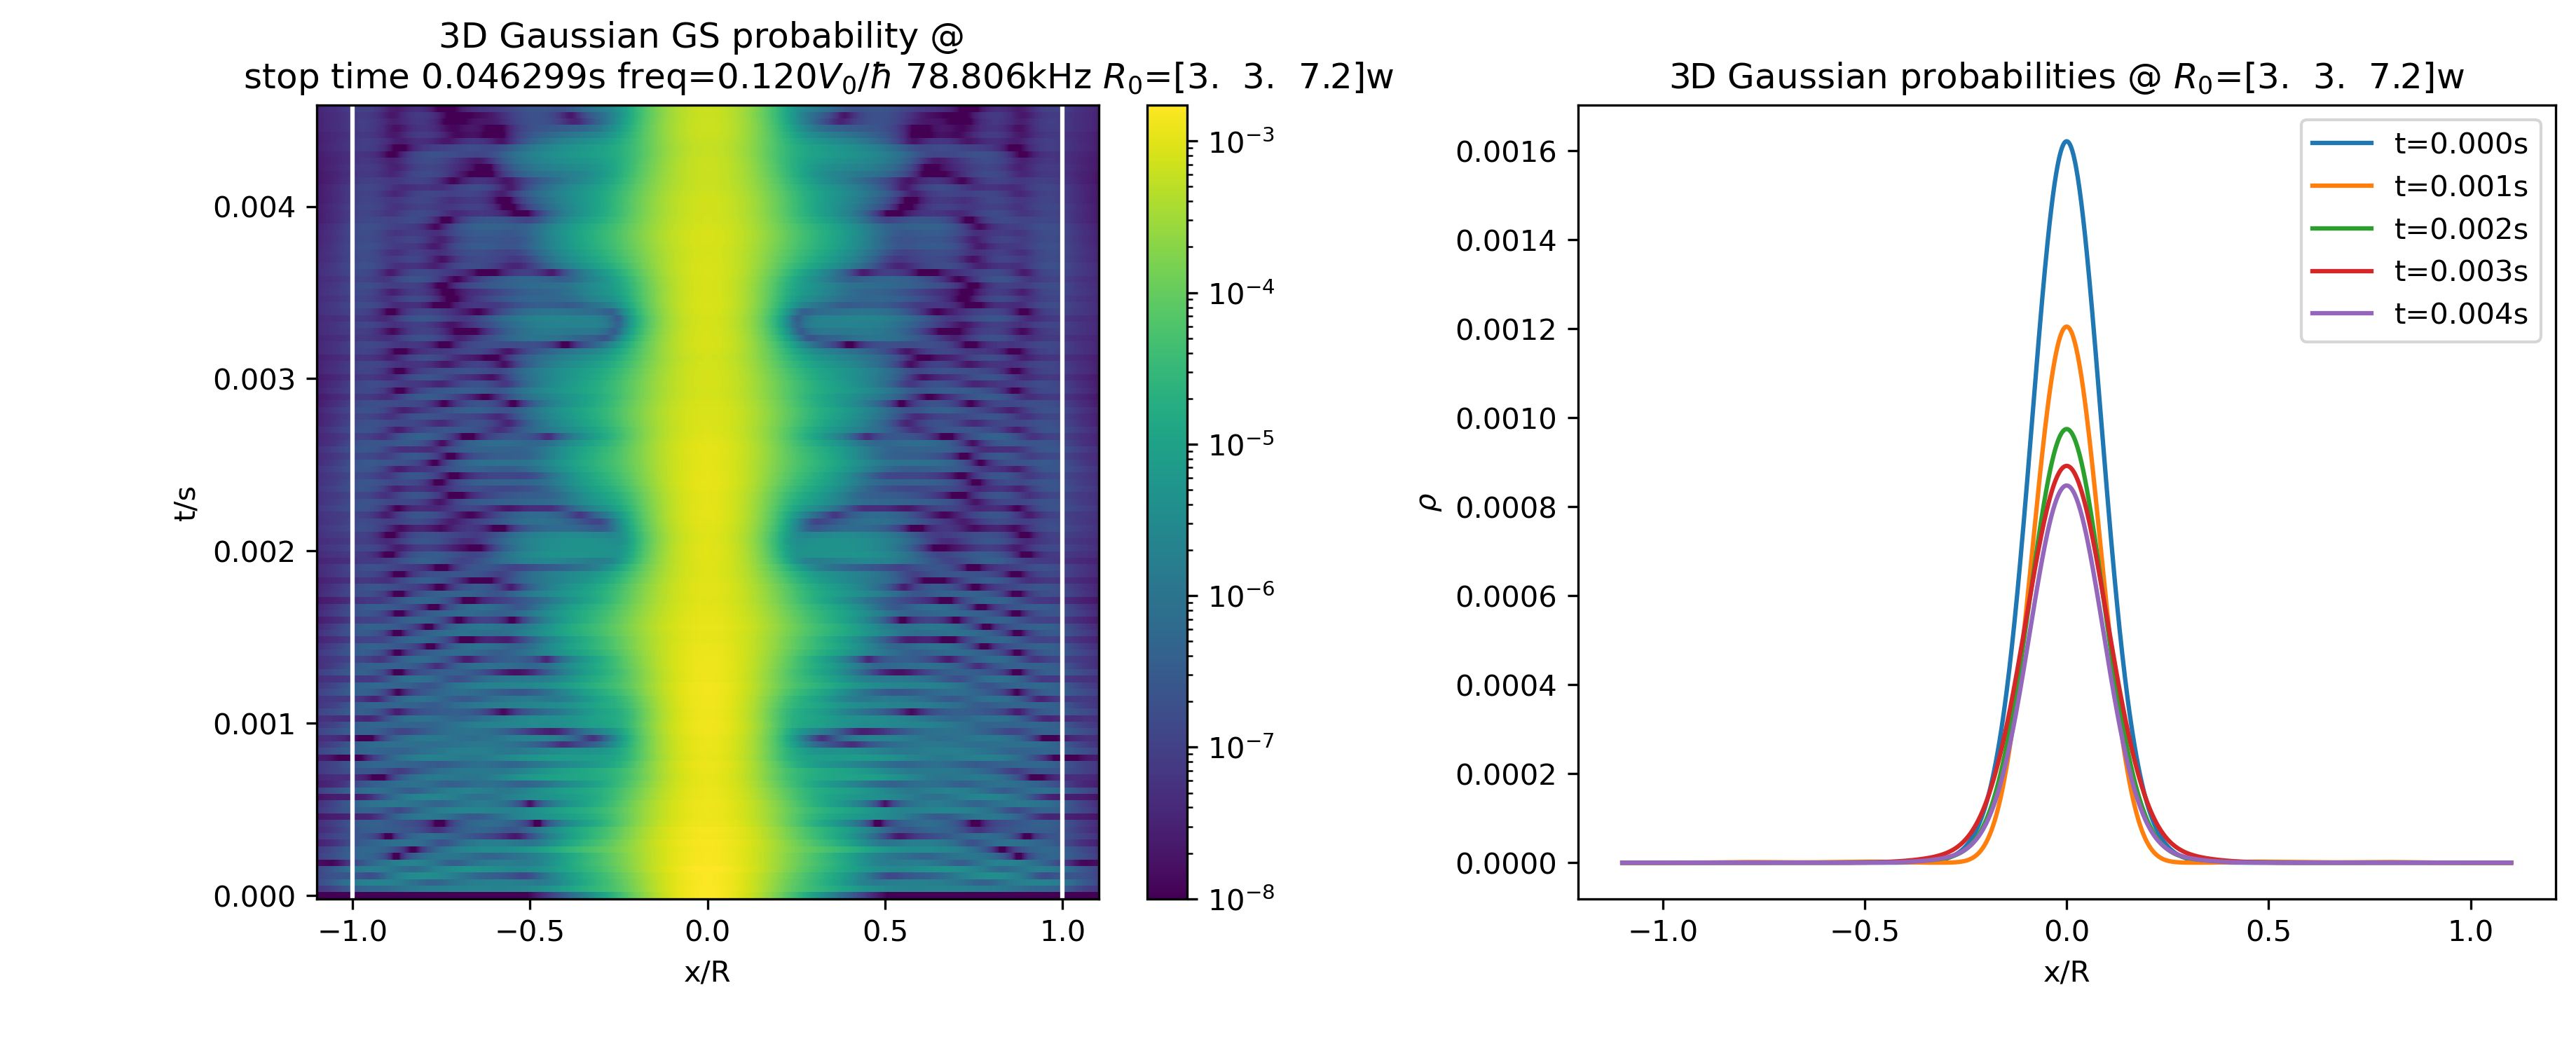

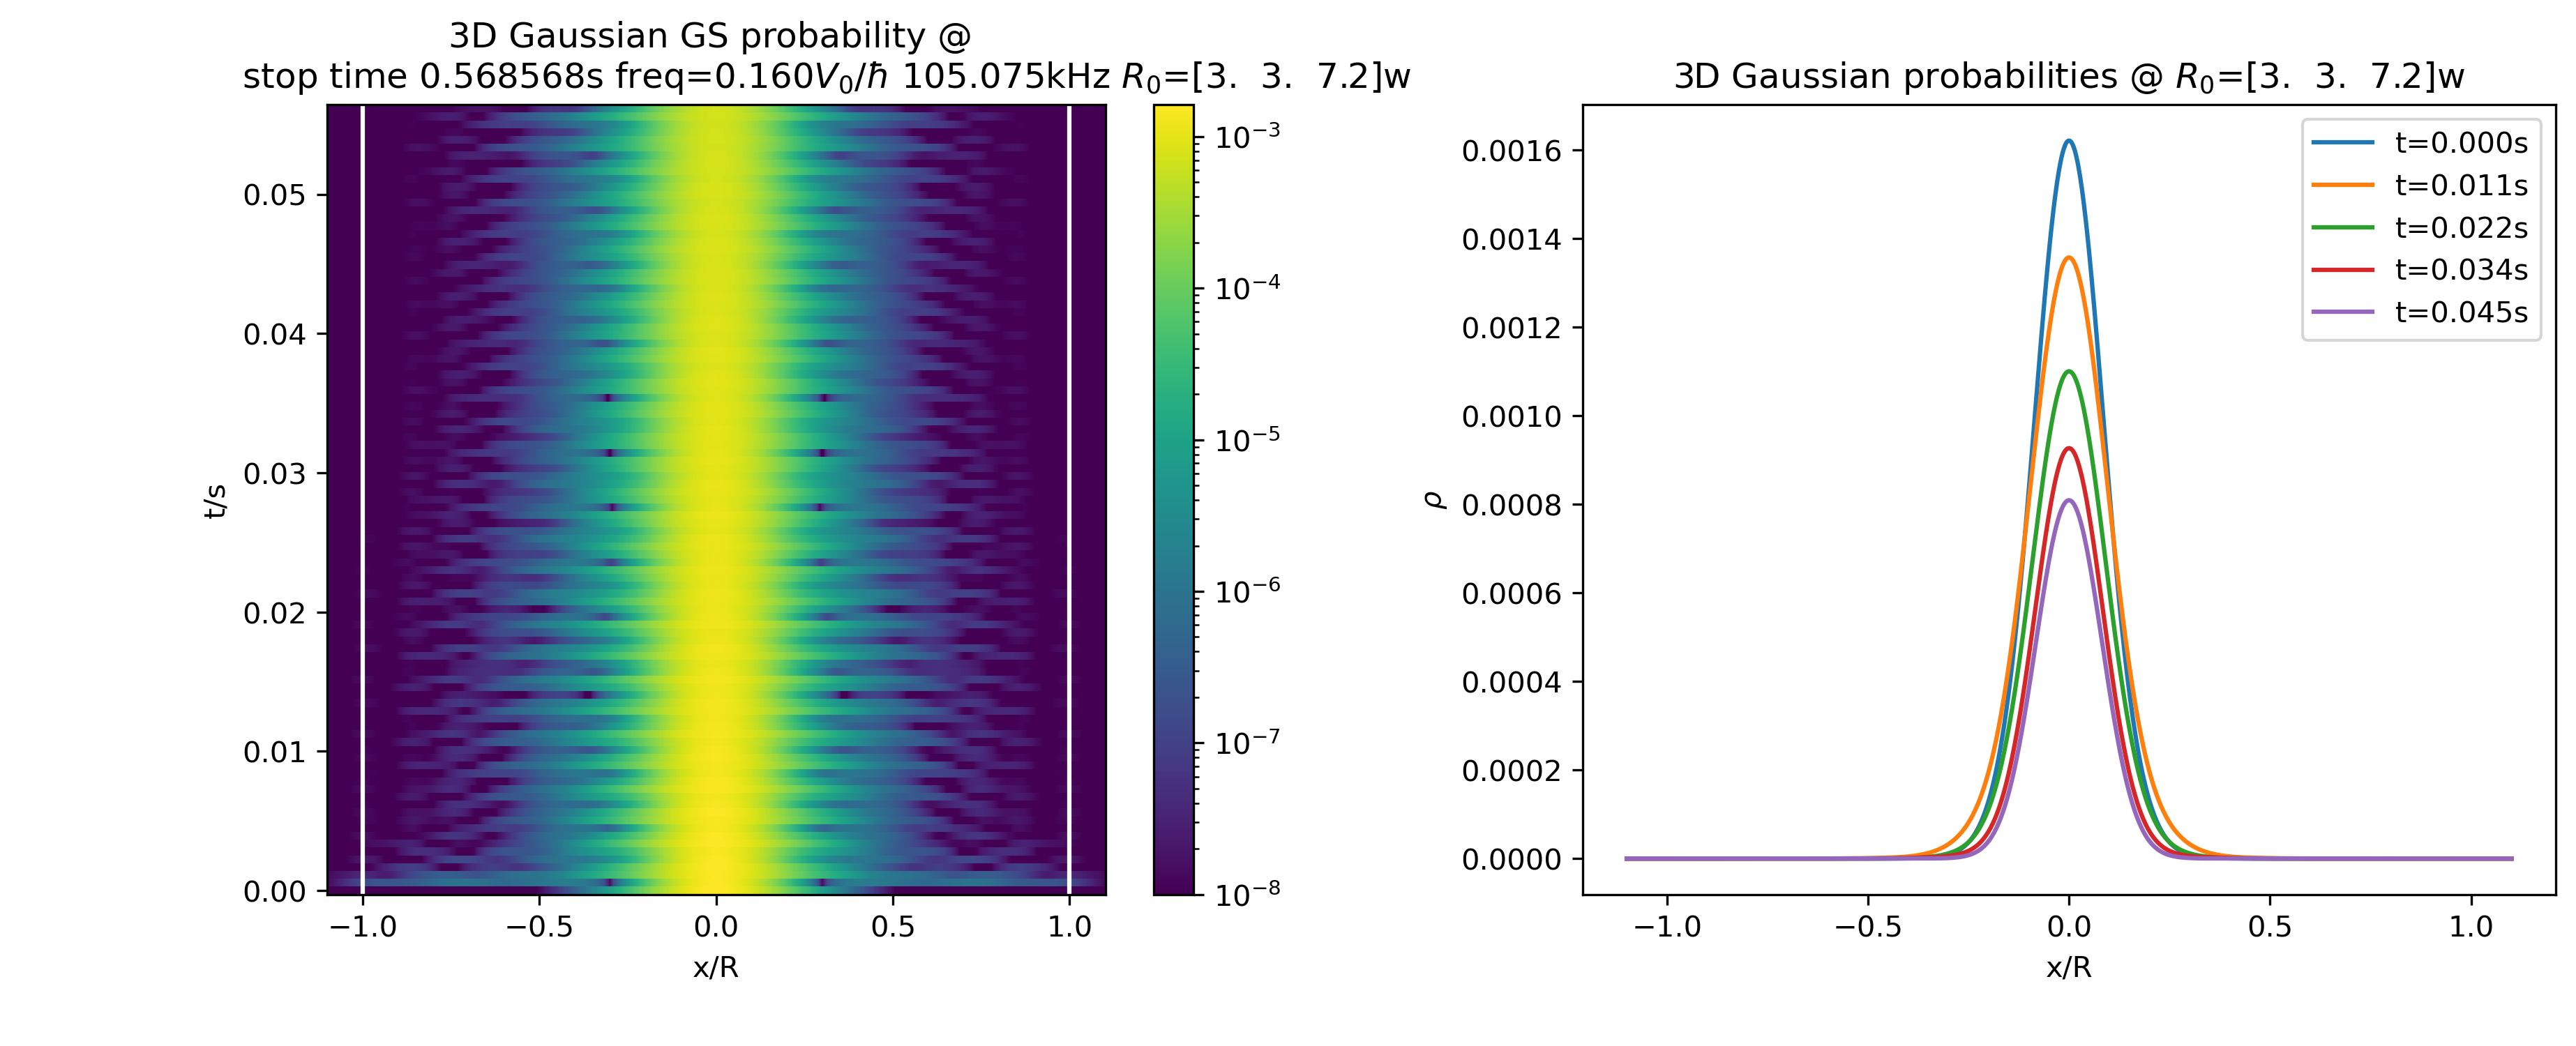

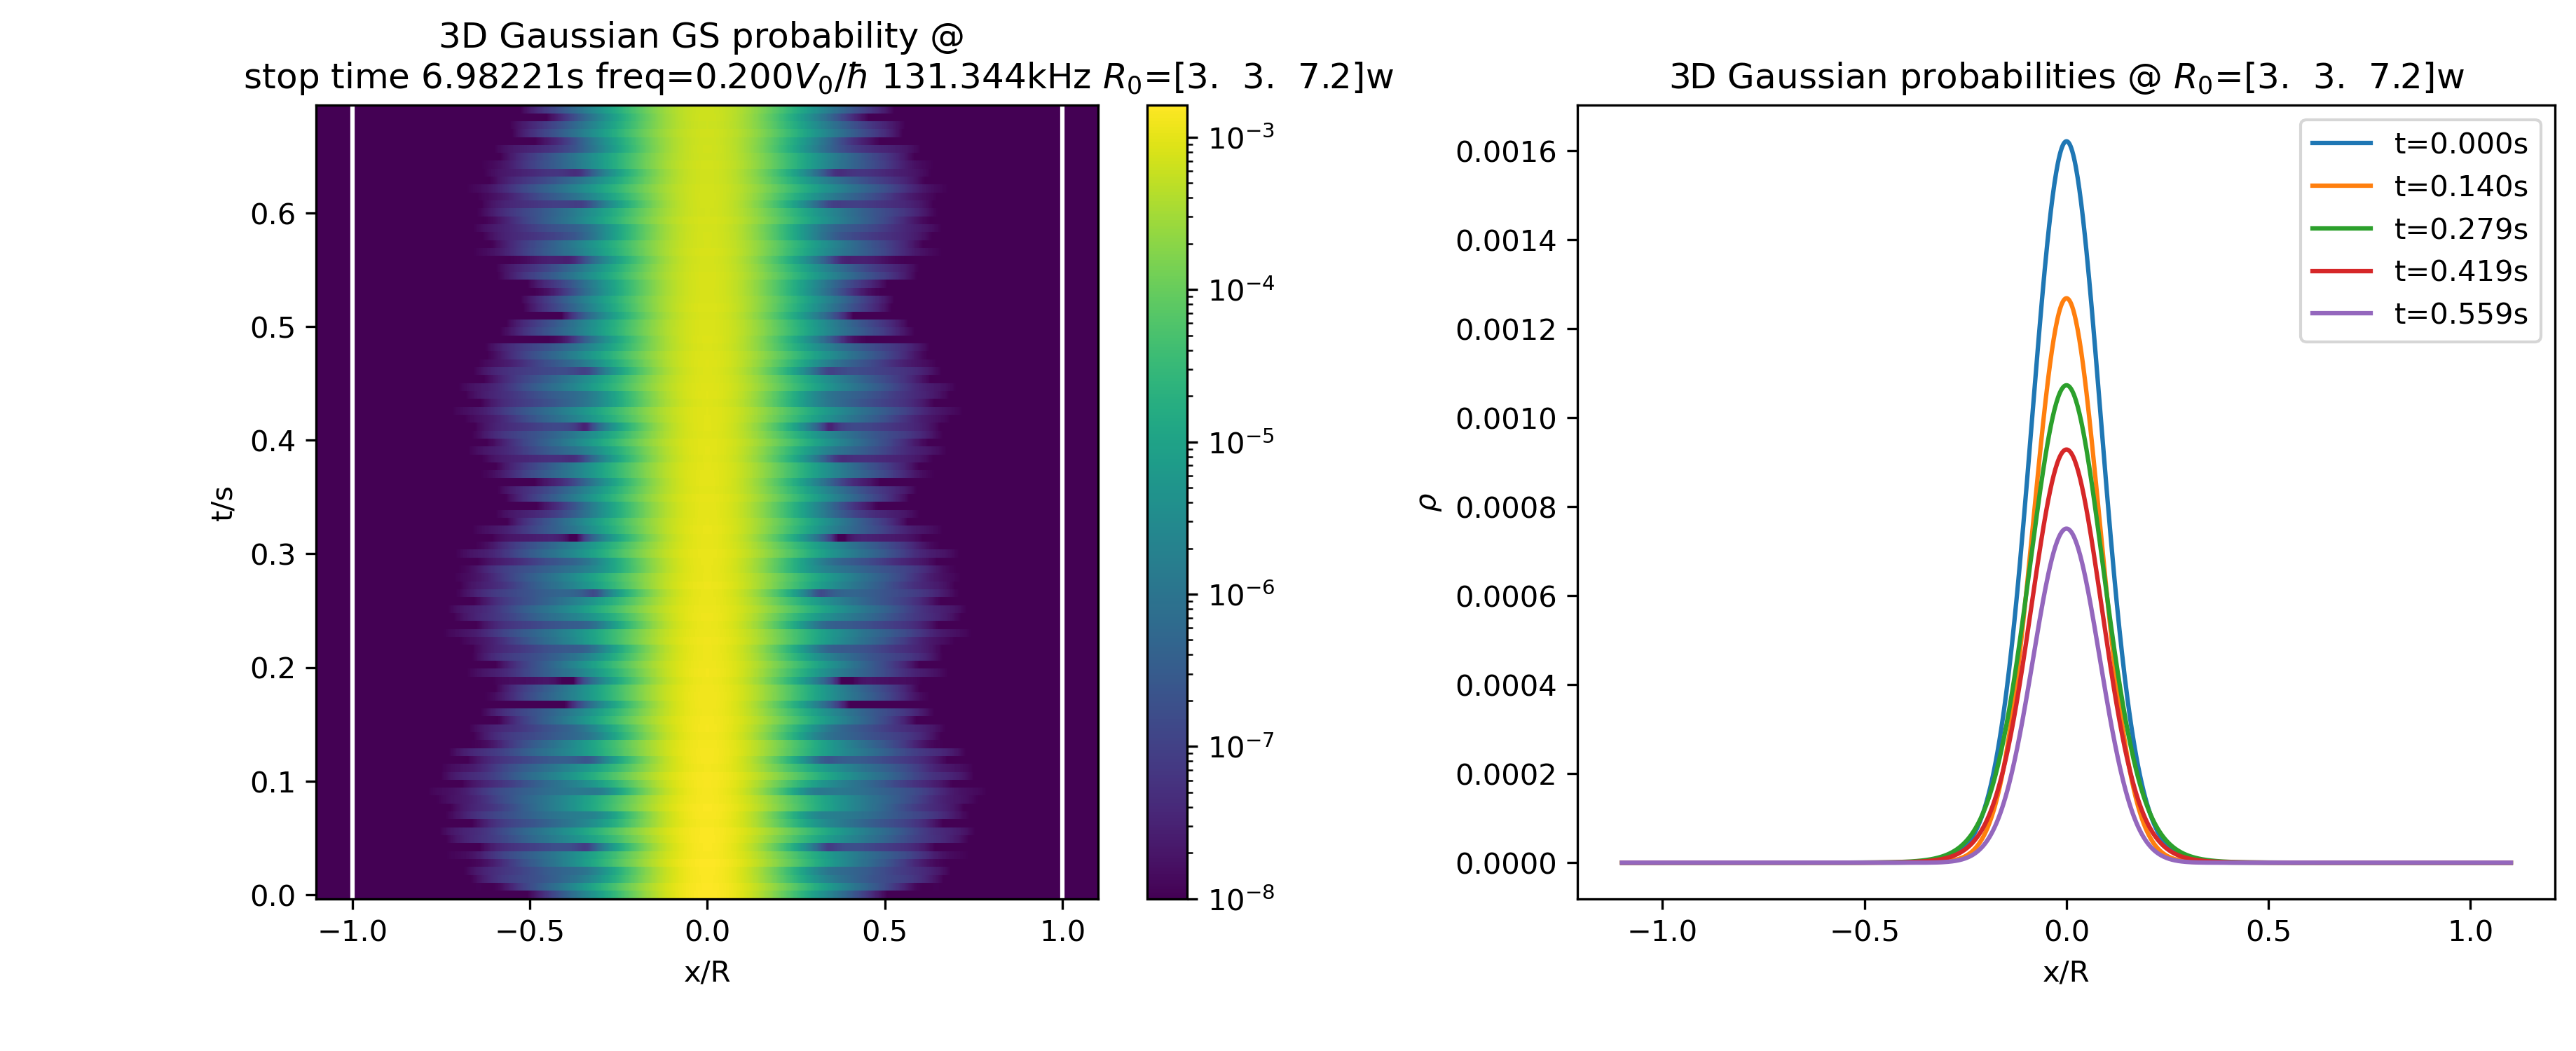

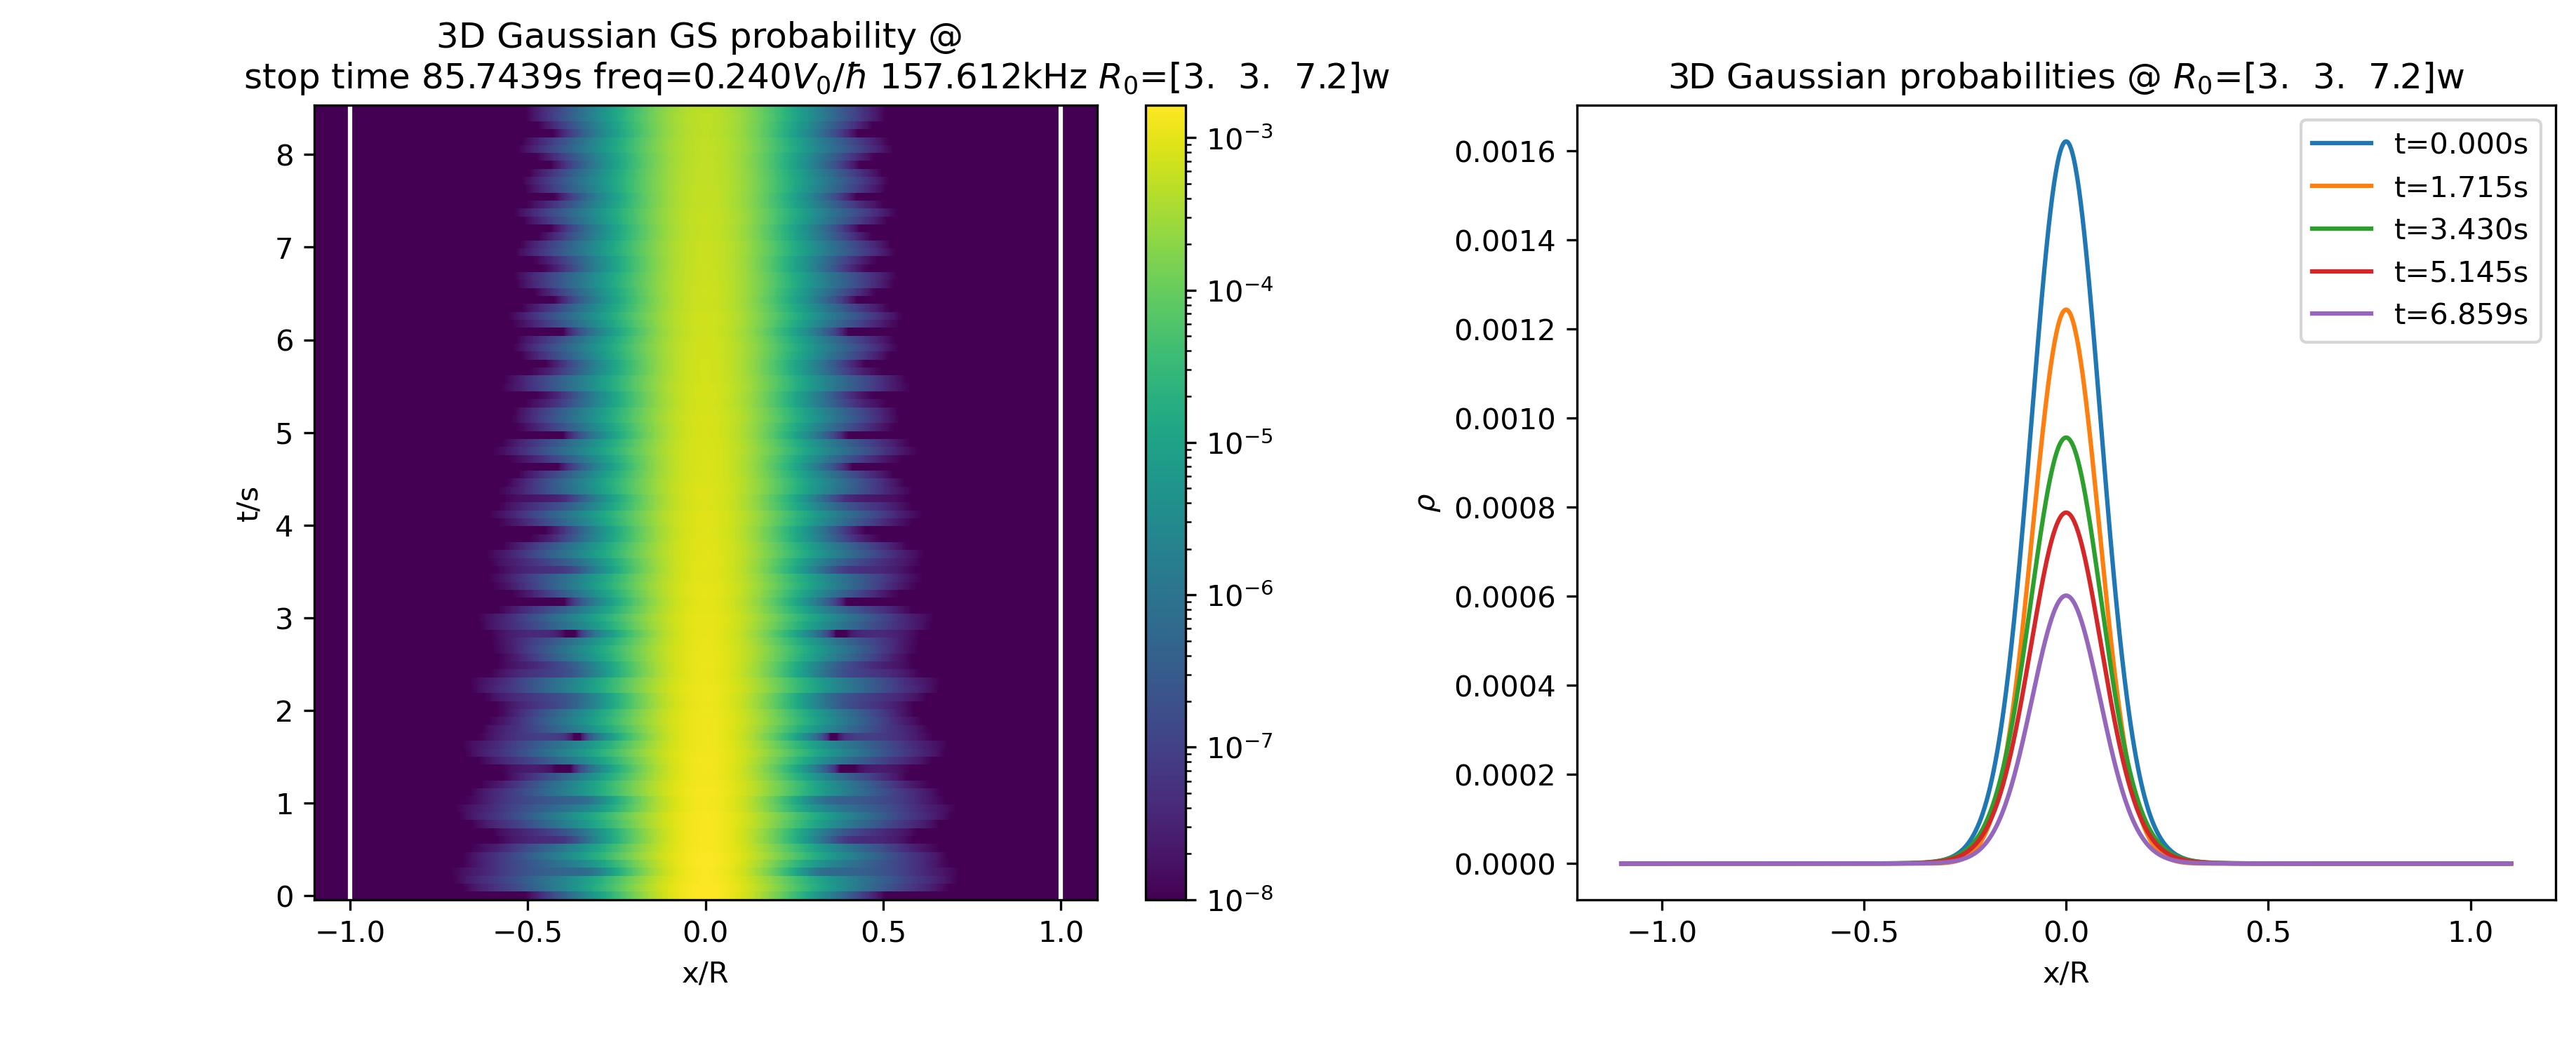

In [1]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os

N_list = range(18, 19, 1)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.26, 0.04)
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-2
sn = 1000.0
plot_wavefunction(N_list,
                  R0_list=[R for i in range(len(N_list))],
                  freq_list=freq_list,
                  stop_time_list=st,
                  length=10,
                  step_no=sn,
                  dim=3,
                  symmetry=True,
                  model='Gaussian',
                  cvg='N',
                  realtime=False,
                  absorber=True)